In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('netflix1.csv')
# menampilkan 5 data pertama
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# menampilkan 5 data terakhir
df.tail(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [ ]:
# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
# Drop unnecessary columns (show_id)
df.drop(['show_id'], axis=1, inplace=True)
df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
# Is there any missing values ?
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
df.duplicated().sum()

3

In [ ]:
duplicate_rows = df[df.duplicated(df, keep = False)]
duplicate_rows

,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
2925,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [ ]:
rows_to_keep = duplicate_rows.duplicated(keep='first')
rows_to_keep

393     False
537      True
2925    False
3285    False
4260     True
4261     True
dtype: bool

In [ ]:
indexes_to_drop = duplicate_rows[~rows_to_keep].index
indexes_to_drop

Int64Index([393, 2925, 3285], dtype='int64')

In [ ]:
df = df.drop(indexes_to_drop)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%m/%d/%Y')

In [ ]:
df

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [ ]:
# Shape of data (Rows , columns)
print("The shape of data is ",df.shape)

The shape of data is  (8787, 9)


In [ ]:
# What is more ? TV show or Moives
df['type'].value_counts()

Movie      6124
TV Show    2663
Name: type, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

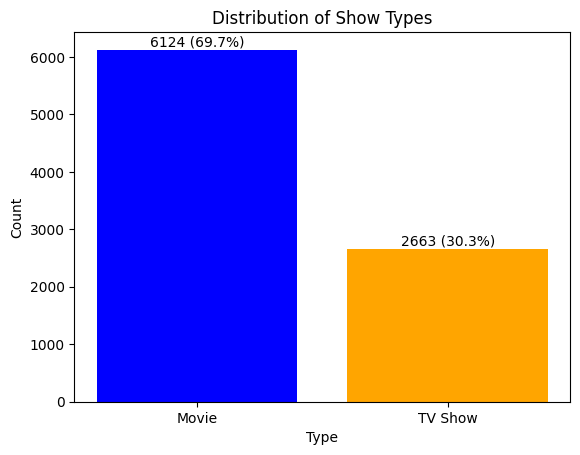

In [ ]:
type_counts = df['type'].value_counts()

colors = ['blue', 'orange']

total_count = sum(type_counts.values)
percentages = [(count / total_count) * 100 for count in type_counts.values]

plt.bar(type_counts.index, type_counts.values, color=colors)

for i, (count, percentage) in enumerate(zip(type_counts.values, percentages)):
    plt.text(i, count, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Show Types')

plt.show()

<Axes: xlabel='country'>

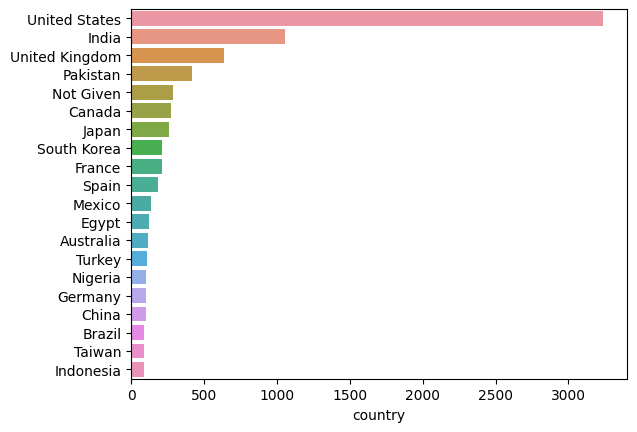

In [ ]:
type_df = pd.DataFrame(df['country'].value_counts())[0:20]
sns.barplot(type_df , y = type_df.index , x = 'country')

In [ ]:
country_type_counts = df.groupby(['country', 'type']).size().unstack()
country_type_counts

type,Movie,TV Show
country,,
Argentina,56.0,20.0
Australia,61.0,53.0
Austria,8.0,1.0
Bangladesh,3.0,NaN
Belarus,NaN,1.0
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,NaN
Vietnam,7.0,NaN


In [ ]:
top_10_countries = country_type_counts.sum(axis=1).nlargest(10).index
top_10_countries

Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given',
       'Canada', 'Japan', 'South Korea', 'France', 'Spain'],
      dtype='object', name='country')

In [ ]:
country_type_counts_top_10 = country_type_counts.loc[top_10_countries]
country_type_counts_top_10

type,Movie,TV Show
country,,
United States,2395.0,845.0
India,975.0,81.0
United Kingdom,387.0,251.0
Pakistan,71.0,349.0
Not Given,257.0,30.0
Canada,187.0,84.0
Japan,87.0,172.0
South Korea,49.0,165.0
France,148.0,65.0


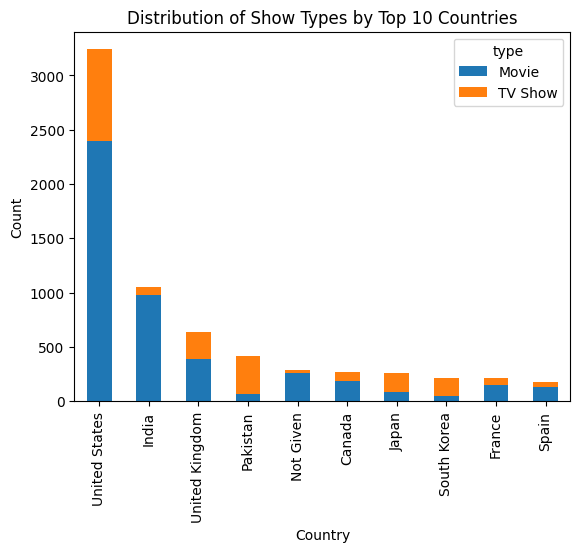

In [ ]:
country_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Countries')

plt.show()

In [ ]:
movie_counts = df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()
movie_counts

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    765
2018    766
2019    632
2020    517
2021    277
Name: release_year, Length: 73, dtype: int64

In [ ]:
tv_show_counts = df[df['type'] == 'TV Show']['release_year'].value_counts().sort_index()
tv_show_counts

1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003      8
2004      9
2005     13
2006     14
2007     14
2008     22
2009     34
2010     39
2011     40
2012     63
2013     61
2014     88
2015    159
2016    243
2017    265
2018    378
2019    397
2020    436
2021    315
Name: release_year, dtype: int64

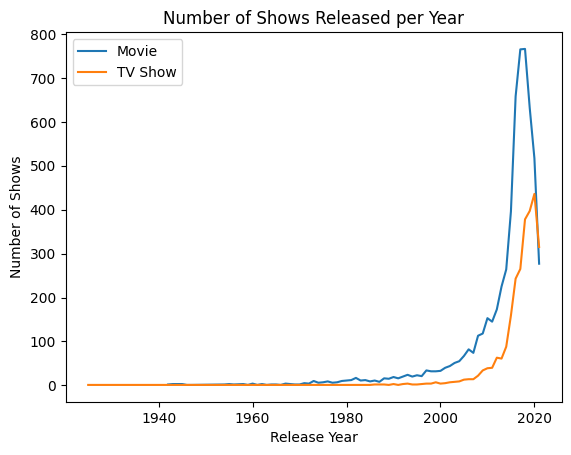

In [ ]:
plt.plot(movie_counts.index, movie_counts.values, label='Movie')
plt.plot(tv_show_counts.index, tv_show_counts.values, label='TV Show')

plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released per Year')
plt.legend()

plt.show()

In [ ]:
genre_type_counts = df.groupby(['listed_in', 'type']).size().unstack()
genre_type_counts

type,Movie,TV Show
listed_in,,
Action & Adventure,128.0,NaN
"Action & Adventure, Anime Features",1.0,NaN
"Action & Adventure, Anime Features, Children & Family Movies",4.0,NaN
"Action & Adventure, Anime Features, Classic Movies",2.0,NaN
"Action & Adventure, Anime Features, Horror Movies",1.0,NaN
...,...,...
"TV Horror, TV Mysteries, Teen TV Shows",NaN,1.0
"TV Horror, Teen TV Shows",NaN,2.0
"TV Sci-Fi & Fantasy, TV Thrillers",NaN,1.0


In [ ]:
top_10_genre = genre_type_counts.sum(axis=1).nlargest(10).index
top_10_genre

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', 'Kids' TV',
       'Children & Family Movies', 'Children & Family Movies, Comedies',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies'],
      dtype='object', name='listed_in')

In [ ]:
genre_type_counts_top_10 = genre_type_counts.loc[top_10_genre]
genre_type_counts_top_10

type,Movie,TV Show
listed_in,,
"Dramas, International Movies",362.0,NaN
Documentaries,359.0,NaN
Stand-Up Comedy,334.0,NaN
"Comedies, Dramas, International Movies",274.0,NaN
"Dramas, Independent Movies, International Movies",252.0,NaN
Kids' TV,NaN,219.0
Children & Family Movies,215.0,NaN
"Children & Family Movies, Comedies",201.0,NaN
"Documentaries, International Movies",186.0,NaN


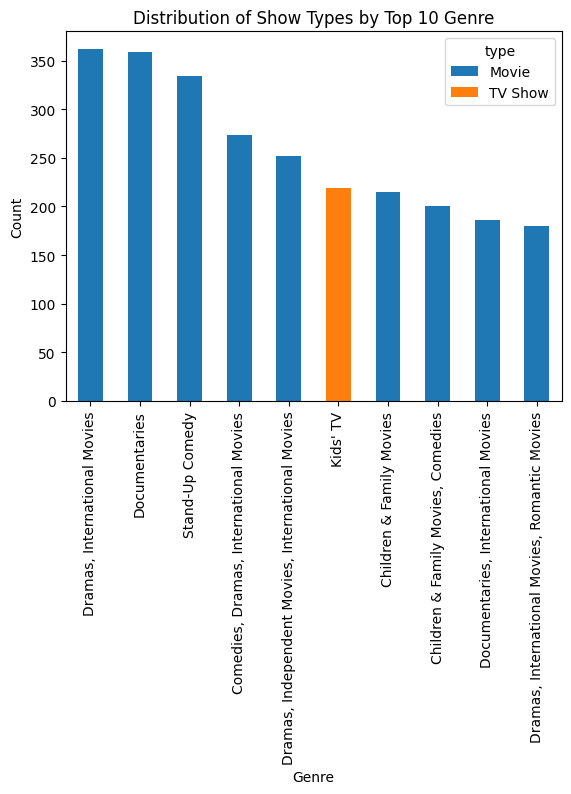

In [ ]:
genre_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Genre')

plt.show()

In [ ]:
movie_20 = df[df['release_year'] == 2020].sort_values(ascending = False , by = 'duration')[0:10]

In [ ]:
movie_20[[ 'title' ,'release_year' , 'duration']]

,title,release_year,duration
1907,Ride Like a Girl,2020,99 min
1438,U-Turn,2020,99 min
821,Rogue Warfare: Death of a Nation,2020,99 min
1464,Dolly Parton’s Christmas on the Square,2020,99 min
1589,A Babysitter's Guide to Monster Hunting,2020,99 min
1717,#Alive,2020,99 min
1319,Tony Parker: The Final Shot,2020,99 min
173,Here and There,2020,99 min
1176,The Block Island Sound,2020,99 min
1679,Whipped,2020,98 min


In [ ]:
director = pd.DataFrame(df['director'].value_counts())[1:11]
director

,director
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Jay Chapman,12
Youssef Chahine,12


In [ ]:
movie_df = df[df['type'] == 'Movie']
rating_counts_movie = movie_df['rating'].value_counts()
rating_counts_movie

TV-MA       2062
TV-14       1426
R            796
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

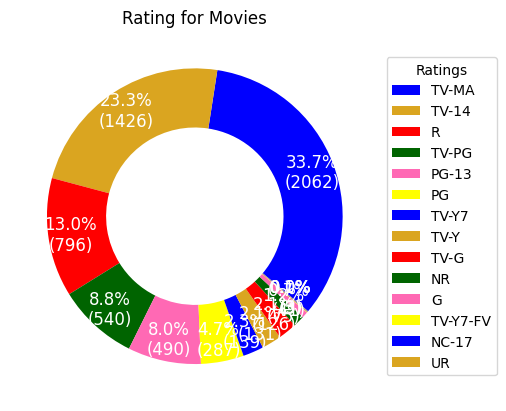

In [ ]:
fig, ax = plt.subplots()
colors = ['#0000FF', '#DAA520', '#FF0000', '#006400', '#FF69B4', '#FFFF00']
wedges, text, autotexts = ax.pie(rating_counts_movie, colors=colors, wedgeprops=dict(width=0.4), startangle=-40,
                                 autopct='%1.1f%%',  pctdistance=0.85, textprops={'fontsize': 12})

ax.legend(wedges, rating_counts_movie.index, title='Ratings', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='Rating for Movies')

label_format = '{:.1f}%\n({})'
for i, autotext in enumerate(autotexts):
    autotext.set_text(label_format.format(rating_counts_movie[i] / sum(rating_counts_movie) * 100, rating_counts_movie[i]))
    autotext.set_color('white')

plt.show()

In [ ]:
TV_df = df[df['type'] == 'TV Show']
rating_counts_TV = TV_df['rating'].value_counts()
rating_counts_TV

TV-MA       1143
TV-14        729
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

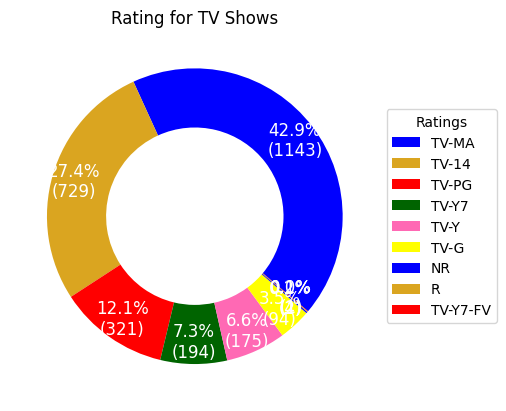

In [ ]:
fig, ax = plt.subplots()
colors = ['#0000FF', '#DAA520', '#FF0000', '#006400', '#FF69B4', '#FFFF00']
wedges, text, autotexts = ax.pie(rating_counts_TV, colors=colors, wedgeprops=dict(width=0.4), startangle=-40,
                                 autopct='%1.1f%%',  pctdistance=0.85, textprops={'fontsize': 12})

ax.legend(wedges, rating_counts_TV.index, title='Ratings', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='Rating for TV Shows')

label_format = '{:.1f}%\n({})'
for i, autotext in enumerate(autotexts):
    autotext.set_text(label_format.format(rating_counts_TV[i] / sum(rating_counts_TV) * 100, rating_counts_TV[i]))
    autotext.set_color('white')

plt.show()